In [1]:
import numpy as np
import cvxpy as cp
import matplotlib
import matplotlib.pylab as plt

In [2]:
def water_filling(n, a, sum_x=1):
    '''
    Boyd and Vandenberghe, Convex Optimization, example 5.2 page 145
    Water-filling.

    This problem arises in information theory, in allocating power to a set of
    n communication channels in order to maximise the total channel capacity.
    The variable x_i represents the transmitter power allocated to the ith channel,
    and log(α_i+x_i) gives the capacity or maximum communication rate of the channel.
    The objective is to minimise -∑log(α_i+x_i) subject to the constraint ∑x_i = 1
    '''

    # Declare variables and parameters
    x = cp.Variable(shape=n)
    alpha = cp.Parameter(n, nonneg=True)
    alpha.value = a

    # Choose objective function. Interpret as maximising the total communication rate of all the channels
    obj = cp.Maximize(cp.sum(cp.log(alpha + x)))

    # Declare constraints
    constraints = [x >= 0, cp.sum(x) - sum_x == 0]

    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan

In [3]:
# As an example, we will solve the water filling problem with 3 buckets, each with different α
np.set_printoptions(precision=3)
buckets = 3
alpha = np.array([0.8, 1.0, 1.2])

In [4]:
stat, prob, x = water_filling(buckets, alpha)
print('Problem status: {}'.format(stat))
print('Optimal communication rate = {:.4g} '.format(prob))
print('Transmitter powers:\n{}'.format(x))

Problem status: optimal
Optimal communication rate = 0.863 
Transmitter powers:
[0.533 0.333 0.133]


c:\Users\nazmievairat\anaconda3\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


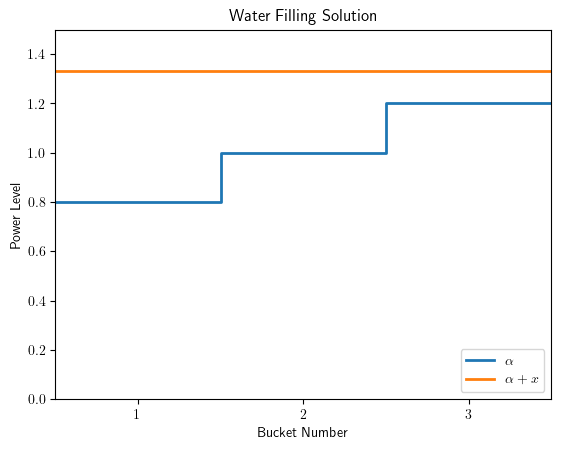

In [5]:
matplotlib.rcParams.update({"text.usetex" : True})

axis = np.arange(0.5,buckets+1.5,1)
index = axis+0.5
X = x.copy()
Y = alpha + X

# to include the last data point as a step, we need to repeat it
A = np.concatenate((alpha,[alpha[-1]]))
X = np.concatenate((X,[X[-1]]))
Y = np.concatenate((Y,[Y[-1]]))

plt.xticks(index)
plt.xlim(0.5,buckets+0.5)
plt.ylim(0,1.5)
plt.step(axis,A,where='post',label =r'$\alpha$',lw=2)
plt.step(axis,Y,where='post',label=r'$\alpha + x$',lw=2)
plt.legend(loc='lower right')
plt.xlabel('Bucket Number')
plt.ylabel('Power Level')
plt.title('Water Filling Solution')
plt.show()